In [1]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
train_features = pd.read_csv('dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('dengue_labels_train.csv',
                           index_col=[0,1,2])
test_features = pd.read_csv('dengue_features_test.csv', index_col= [0, 1, 2])

In [3]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']
sj_test_features = test_features.loc['sj']
# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']
iq_test_features = test_features.loc['iq']

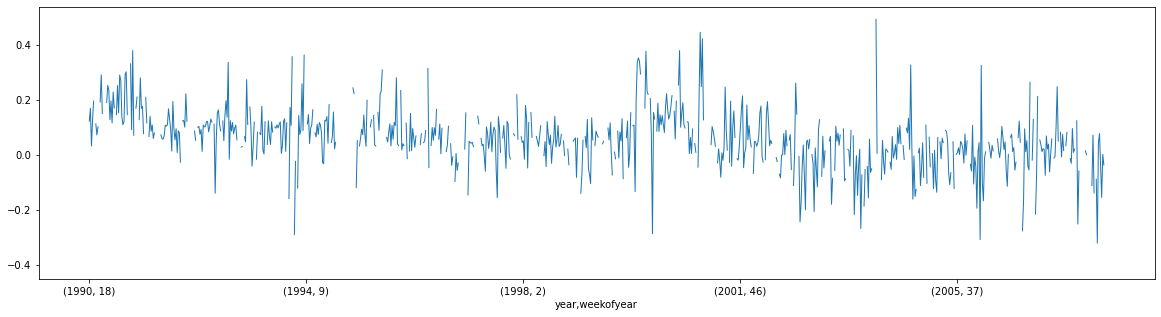

In [4]:
plt.figure(figsize = (20, 5))
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw = 1))

plt.show()

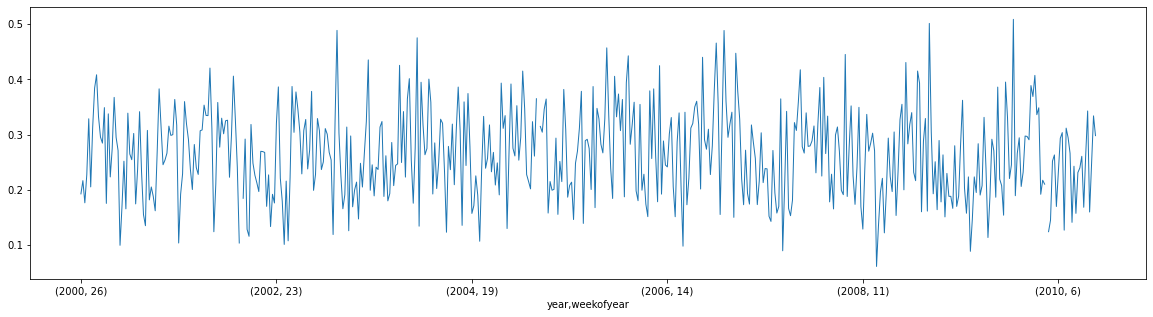

In [5]:
plt.figure(figsize = (20, 5))
(iq_train_features
     .ndvi_ne
     .plot
     .line(lw = 1))

plt.show()

In [6]:
print(sj_train_features.shape)
sj_train_features.isnull().any(axis = 0)

(936, 21)


week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
dtype: bool

In [7]:
print (iq_train_features.shape)
iq_train_features.isnull().any(axis = 0)

(520, 21)


week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
dtype: bool

In [8]:
sj_train_features.sort_index(inplace = True)
sj_train_features.fillna(method = 'ffill', inplace = True)
sj_test_features.fillna(method = 'ffill', inplace = True)

iq_train_features.sort_index(inplace = True)
iq_train_features.fillna(method = 'ffill', inplace = True)
iq_test_features.fillna(method = 'ffill', inplace = True)

In [9]:
sj_train_features.drop('week_start_date', axis = 1, inplace = True)
                       
iq_train_features.drop('week_start_date', axis = 1, inplace = True)

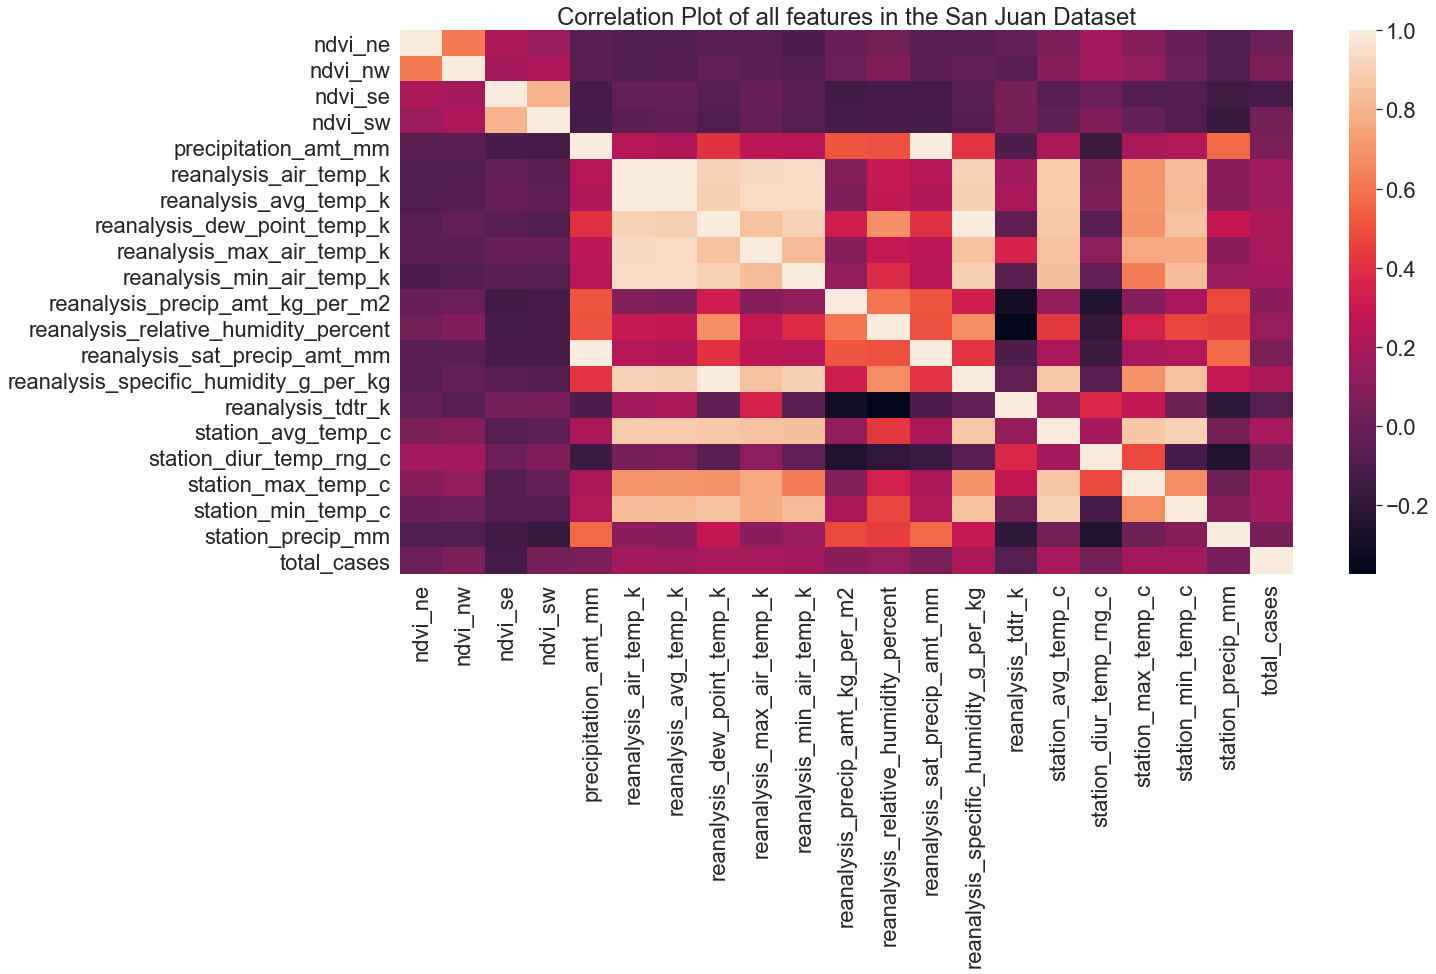

In [10]:
import seaborn as sns

sj_train_features['total_cases'] = sj_train_labels['total_cases']

sj_corr = sj_train_features.corr()

sns.set(font_scale = 2)
plt.figure(figsize=(20, 10))

sns.heatmap(sj_corr)
plt.title('Correlation Plot of all features in the San Juan Dataset')
plt.show()

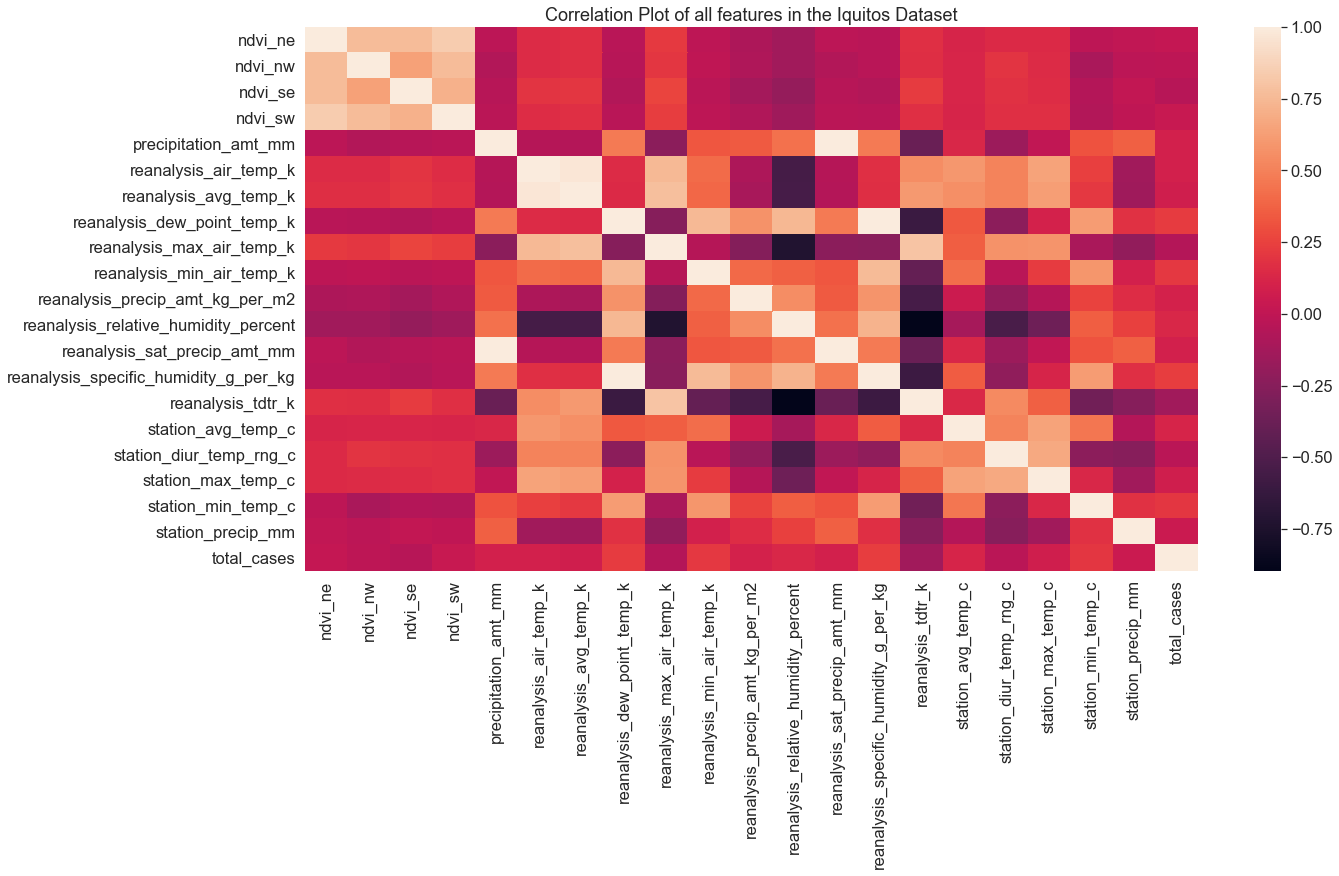

In [105]:
iq_train_features['total_cases'] = iq_train_labels['total_cases']

iq_corr = iq_train_features.corr()

plt.figure(figsize=(20, 10))

sns.heatmap(iq_corr)
plt.title('Correlation Plot of all features in the Iquitos Dataset')
plt.show()

<AxesSubplot:>

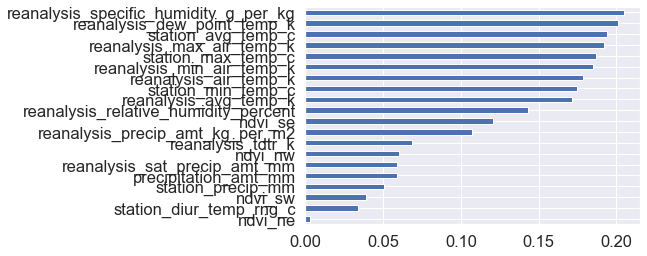

In [12]:
sns.set(font_scale = 1.5)
(abs(sj_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())

<AxesSubplot:>

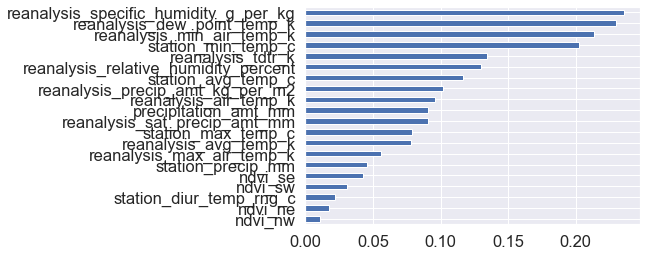

In [13]:
sns.set(font_scale = 1.5)
(abs(iq_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())

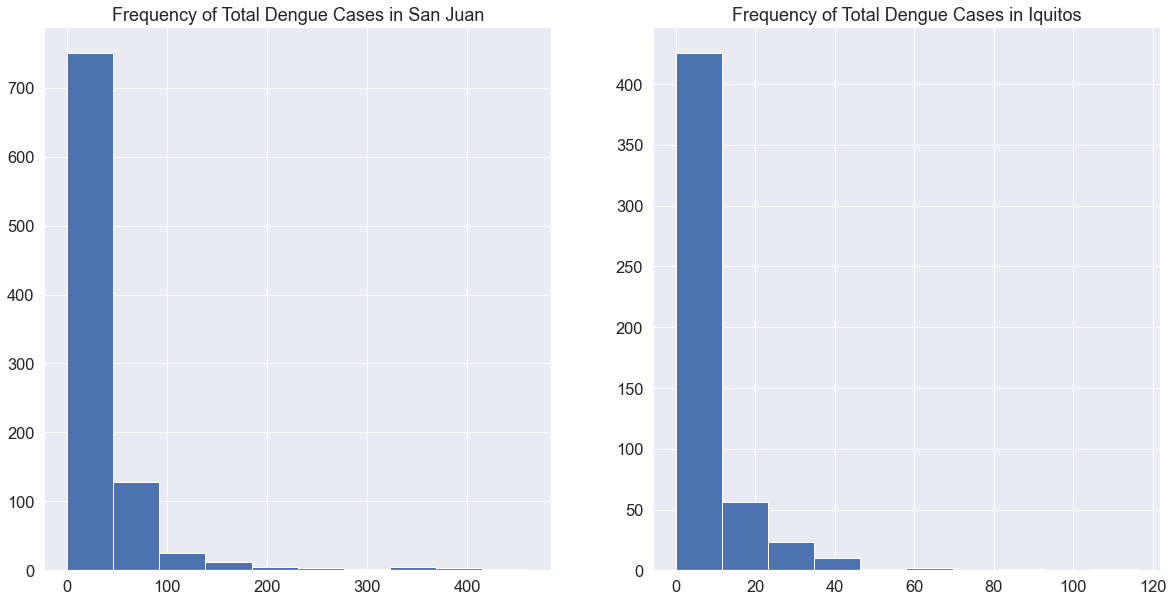

In [14]:
plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.hist(sj_train_features['total_cases'])
plt.title('Frequency of Total Dengue Cases in San Juan')

plt.subplot(1, 2, 2)
plt.hist(iq_train_features['total_cases'])
plt.title('Frequency of Total Dengue Cases in Iquitos')

plt.show()

In [15]:
print ('Mean of San Juan test cases: ', np.mean(sj_train_labels.values))
print ('(Variance of San Juan test cases: ', np.var(sj_train_labels.values))

print ('\nMean of Iquitos test cases: ', np.mean(iq_train_labels.values))
print ('Variance of Iquitos test cases: ', np.var(iq_train_labels.values))

Mean of San Juan test cases:  34.18055555555556
(Variance of San Juan test cases:  2637.2248783238365

Mean of Iquitos test cases:  7.565384615384615
Variance of Iquitos test cases:  115.67264792899408


In [16]:
from sklearn.model_selection import train_test_split

X_sj = sj_train_features.iloc[:, 0:20]
y_sj = sj_train_features['total_cases']
X_sj_train, y_sj_train = X_sj.iloc[:750, :], y_sj[0:750]
X_sj_cv, y_sj_cv = X_sj.iloc[751:, :], y_sj[751:]

In [17]:
X_iq = iq_train_features.iloc[:, 0:20]
y_iq = iq_train_features['total_cases'] 
X_iq_train, y_iq_train = X_iq.iloc[:360, :], y_iq[0:360]
X_iq_cv, y_iq_cv = X_iq.iloc[361:, :], y_iq[361:]

In [18]:
imptVar = abs(iq_corr).total_cases.drop('total_cases').sort_values(ascending = False).index[0:4]

In [19]:
X_sj_temp_train = X_sj_train[imptVar] 
X_sj_temp_cv = X_sj_cv[imptVar]
X_sj_temp_test = sj_test_features[imptVar]

X_iq_temp_train = X_iq_train[imptVar] 
X_iq_temp_cv = X_iq_cv[imptVar]
X_iq_temp_test = iq_test_features[imptVar]

In [20]:
X_sj_temp_train['y'] =  y_sj_train.values
X_sj_temp_cv['y'] = y_sj_cv.values

X_iq_temp_train['y'] = y_iq_train.values
X_iq_temp_cv['y'] = y_iq_cv.values

In [21]:
print (sj_train_features.index[0]) # The date 
print (iq_train_features.index[0])

(1990, 18)
(2000, 26)


In [22]:
sj_rng = pd.date_range('30/04/1990', periods = len(sj_train_features), freq = 'W')
iq_rng = pd.date_range('26/06/2000', periods = len(iq_train_features), freq = 'W')

In [23]:
X_sj_temp_train.index = sj_rng[:750]
X_sj_temp_cv.index = sj_rng[751:]

X_iq_temp_train.index = iq_rng[:360]
X_iq_temp_cv.index = iq_rng[361:]

In [24]:
imptVar

Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'reanalysis_min_air_temp_k', 'station_min_temp_c'],
      dtype='object')

In [144]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures

def mae_nb_model(train, cv):
    formula =  "y ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_min_air_temp_k + " \
                    "station_min_temp_c" 
    alpha_grid = np.linspace(0.01, 2, 100)
    
    best_alpha = 0; best_mae = 1000
    
    for alpha in alpha_grid:
        model = smf.glm(formula = formula, data = train,
                        family = sm.families.NegativeBinomial(alpha = alpha))
        nb_model = model.fit()
        
        cv_pred = np.array(list(map(int, map(round, nb_model.predict(cv)))))

        mae = eval_measures.meanabs(cv_pred, cv.y)
        
        if mae < best_mae:
            best_mae = mae
            best_alpha = alpha
            
    total = pd.concat([train, cv])
    
    print ('mae Negative Binomial Model: ', best_mae)
    return smf.glm(formula = formula, data = total,
                   family = sm.families.NegativeBinomial(alpha = best_alpha)).fit()

In [145]:
def mse_nb_model(train, cv):
    formula =  "y ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_min_air_temp_k + " \
                    "station_min_temp_c" 
    alpha_grid = np.linspace(0.01, 2, 100)
    
    best_alpha = 0; best_mse = 1000
    
    for alpha in alpha_grid:
        model = smf.glm(formula = formula, data = train,
                        family = sm.families.NegativeBinomial(alpha = alpha))
        nb_model = model.fit()
        
        cv_pred = np.array(list(map(int, map(round, nb_model.predict(cv)))))

        mae = eval_measures.meanabs(cv_pred, cv.y)
        mse = eval_measures.mse(cv_pred, cv.y)
        
        if mse < best_mse:
            best_mse = mse
            best_alpha = alpha
            
    total = pd.concat([train, cv])
    
    print ('mse Negative Binomial Model: ', best_mse)
    return smf.glm(formula = formula, data = total,
                   family = sm.families.NegativeBinomial(alpha = best_alpha)).fit()

In [146]:
def mae_poisson_model(train, cv):
    formula =  "y ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_min_air_temp_k + " \
                    "station_min_temp_c" 
    
    model = smf.glm(formula = formula, data = train,
                    family = sm.families.Poisson())
    poisson_model = model.fit()
        

    cv_pred = np.array(list(map(int, map(round, poisson_model.predict(cv)))))

    mae = eval_measures.meanabs(cv_pred, cv.y)
    mse = eval_measures.mse(cv_pred, cv.y)
    
    total = pd.concat([train, cv])
#    print('cv_pred', cv_pred.shape)
#    print('cv_pred', cv_pred)


    print ('mae Poisson Regression Model: ', mae)
    return smf.glm(formula = formula, data = total,
                   family = sm.families.Poisson()).fit()

In [147]:
def mse_poisson_model(train, cv):
    formula =  "y ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_min_air_temp_k + " \
                    "station_min_temp_c" 
    
    model = smf.glm(formula = formula, data = train,
                    family = sm.families.Poisson())
    poisson_model = model.fit()
        

    cv_pred = np.array(list(map(int, map(round, poisson_model.predict(cv)))))

    mae = eval_measures.meanabs(cv_pred, cv.y)
    mse = eval_measures.mse(cv_pred, cv.y)
    
    total = pd.concat([train, cv])
#    print('cv_pred', cv_pred.shape)
#    print('cv_pred', cv_pred)


    print ('mse Poisson Regression Model: ', mse)
    return smf.glm(formula = formula, data = total,
                   family = sm.families.Poisson()).fit()

In [148]:
mae_nb_model(X_sj_temp_train, X_sj_temp_cv)
mae_nb_model(X_iq_temp_train, X_iq_temp_cv)

mse_nb_model(X_sj_temp_train, X_sj_temp_cv)
mse_nb_model(X_iq_temp_train, X_iq_temp_cv)

mae_poisson_model(X_sj_temp_train, X_sj_temp_cv)
mae_poisson_model(X_iq_temp_train, X_iq_temp_cv)

mse_poisson_model(X_sj_temp_train, X_sj_temp_cv)
mse_poisson_model(X_iq_temp_train, X_iq_temp_cv)

mae Negative Binomial Model:  24.8
mae Negative Binomial Model:  7.081761006289308
mse Negative Binomial Model:  875.5729729729729
mse Negative Binomial Model:  141.0503144654088
mae Poisson Regression Model:  24.88108108108108
mae Poisson Regression Model:  7.081761006289308
mse Poisson Regression Model:  885.4864864864865
mse Poisson Regression Model:  141.52201257861634


In [28]:
def mae_ridge_model(train, cv):
    ridge = Ridge(random_state = 10)
    
    param_grid = {'alpha': np.logspace(-4, 3, 50)}
    
    model = GridSearchCV(ridge, param_grid, scoring = 'neg_mean_absolute_error', cv = 10)
   # model = GridSearchCV(ridge, param_grid, scoring = 'neg_mean_squared_error', cv = 10)
    X_var = imptVar
    ridgereg = model.fit(train[X_var], train.y)
        
    cv_pred =np.array(list(map(int, map(round, ridgereg.predict(cv[X_var])))))
    #cv_pred = np.array(list(map(int, map(round, poisson_model.predict(cv)))))

    mae = eval_measures.meanabs(cv_pred, cv.y)
    mse = eval_measures.mse(cv_pred, cv.y)   
    
    total = pd.concat([train, cv])
    
    print ('mae Ridge Regression Model: ', mae)
    return model.fit(total[X_var], total.y)

In [84]:
def mse_ridge_model(train, cv):
    ridge = Ridge(random_state = 10)
    
    param_grid = {'alpha': np.logspace(-4, 3, 50)}
    
   # model = GridSearchCV(ridge, param_grid, scoring = 'neg_mean_absolute_error', cv = 10)
    model = GridSearchCV(ridge, param_grid, scoring = 'neg_mean_squared_error', cv = 10)
    X_var = imptVar
    ridgereg = model.fit(train[X_var], train.y)
        
    cv_pred =np.array(list(map(int, map(round, ridgereg.predict(cv[X_var])))))
 
    mae = eval_measures.meanabs(cv_pred, cv.y)
    mse = eval_measures.mse(cv_pred, cv.y)
    
    total = pd.concat([train, cv])
    
    print ('mse Ridge Regression Model: ', mse)
    return model.fit(total[X_var], total.y)

In [106]:
def mse_lasso_model(train, cv):
    lasso = Lasso(random_state = 10)
    
    param_grid = {'alpha': np.logspace(-4, 3, 50), }
    
#   model = GridSearchCV(lasso, param_grid, scoring = 'neg_mean_absolute_error', cv = 10)
    model = GridSearchCV(lasso, param_grid, scoring = 'neg_mean_squared_error', cv = 10)    
    X_var = imptVar
    lassoreg = model.fit(train[X_var], train.y)
        
    cv_pred = np.array(list(map(int, map(round, lassoreg.predict(cv[X_var])))))
    #cv_pred = lassoreg.predict(cv[X_var])

    mse = eval_measures.mse(cv_pred, cv.y)
    mae = eval_measures.meanabs(cv_pred, cv.y)
    
    total = pd.concat([train, cv])
    
#    print ('Lasso Regression Model: ', mae)
#    print('cv_pred', cv_pred.shape)
    print ('mse Lasso Regression Model: ', mse)
    lasso = model.fit(total[X_var], total.y)
    return lasso

In [107]:
def mae_lasso_model(train, cv):
    lasso = Lasso(random_state = 10)
    
    param_grid = {'alpha': np.logspace(-4, 3, 50), }
    
    model = GridSearchCV(lasso, param_grid, scoring = 'neg_mean_absolute_error', cv = 10)
#    model = GridSearchCV(lasso, param_grid, scoring = 'neg_mean_squared_error', cv = 10)

    X_var = imptVar
    lassoreg = model.fit(train[X_var], train.y)
        
    cv_pred = np.array(list(map(int, map(round, lassoreg.predict(cv[X_var])))))
    #v_pred = lassoreg.predict(cv[X_var])

    mse = eval_measures.mse(cv_pred, cv.y)
    mae = eval_measures.meanabs(cv_pred, cv.y)
    
    total = pd.concat([train, cv])
    
    print ('mae Lasso Regression Model: ', mae)
#    print('cv_pred', cv_pred.shape)
#   print ('Lasso Regression Model: ', mse)
    lasso = model.fit(total[X_var], total.y)
    return lasso

In [108]:
mae_ridge_model(X_sj_temp_train, X_sj_temp_cv)
mae_ridge_model(X_iq_temp_train, X_iq_temp_cv)

mse_ridge_model(X_sj_temp_train, X_sj_temp_cv)
mse_ridge_model(X_iq_temp_train, X_iq_temp_cv)

mae_lasso_model(X_sj_temp_train, X_sj_temp_cv)
mae_lasso_model(X_iq_temp_train, X_iq_temp_cv)

mse_lasso_model(X_sj_temp_train, X_sj_temp_cv)
mse_lasso_model(X_iq_temp_train, X_iq_temp_cv)

mae Ridge Regression Model:  25.63783783783784
mae Ridge Regression Model:  7.213836477987422
mse Ridge Regression Model:  938.1135135135136
mse Ridge Regression Model:  140.37735849056602
mae Lasso Regression Model:  25.74054054054054
mae Lasso Regression Model:  7.314465408805032
mse Lasso Regression Model:  926.5783783783784
mse Lasso Regression Model:  138.72327044025158


GridSearchCV(cv=10, estimator=Lasso(random_state=10),
             param_grid={'alpha': array([1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
       1.93069773e-02, 2.68269580e-02, 3...
       1.00000000e+00, 1.38949549e+00, 1.93069773e+00, 2.68269580e+00,
       3.72759372e+00, 5.17947468e+00, 7.19685673e+00, 1.00000000e+01,
       1.38949549e+01, 1.93069773e+01, 2.68269580e+01, 3.72759372e+01,
       5.17947468e+01, 7.19685673e+01, 1.00000000e+02, 1.38949549e+02,
       1.93069773e+02, 2.68269580e+02, 3.72759372e+02, 5.17947468e+02,
       7.19685673e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [89]:
nb_sj_model = try_nb_model(X_sj_temp_train, X_sj_temp_cv)
nb_iq_model = try_nb_model(X_iq_temp_train, X_iq_temp_cv)

poission_sj_model = try_poisson_model(X_sj_temp_train, X_sj_temp_cv)
poission_iq_model = try_poisson_model(X_iq_temp_train, X_iq_temp_cv)

ridge_sj_model = mae_ridge_model(X_sj_temp_train, X_sj_temp_cv)
ridge_iq_model = mae_ridge_model(X_iq_temp_train, X_iq_temp_cv)

lasso_sj_model = mae_lasso_model(X_sj_temp_train, X_sj_temp_cv)
lasso_iq_model = mae_lasso_model(X_iq_temp_train, X_iq_temp_cv)

Negative Binomial Model:  24.8
Negative Binomial Model:  7.081761006289308
Poisson Regression Model:  24.88108108108108
Poisson Regression Model:  7.081761006289308
mae Ridge Regression Model:  25.63783783783784
mae Ridge Regression Model:  7.213836477987422
mae Lasso Regression Model:  25.74054054054054
mae Lasso Regression Model:  7.314465408805032


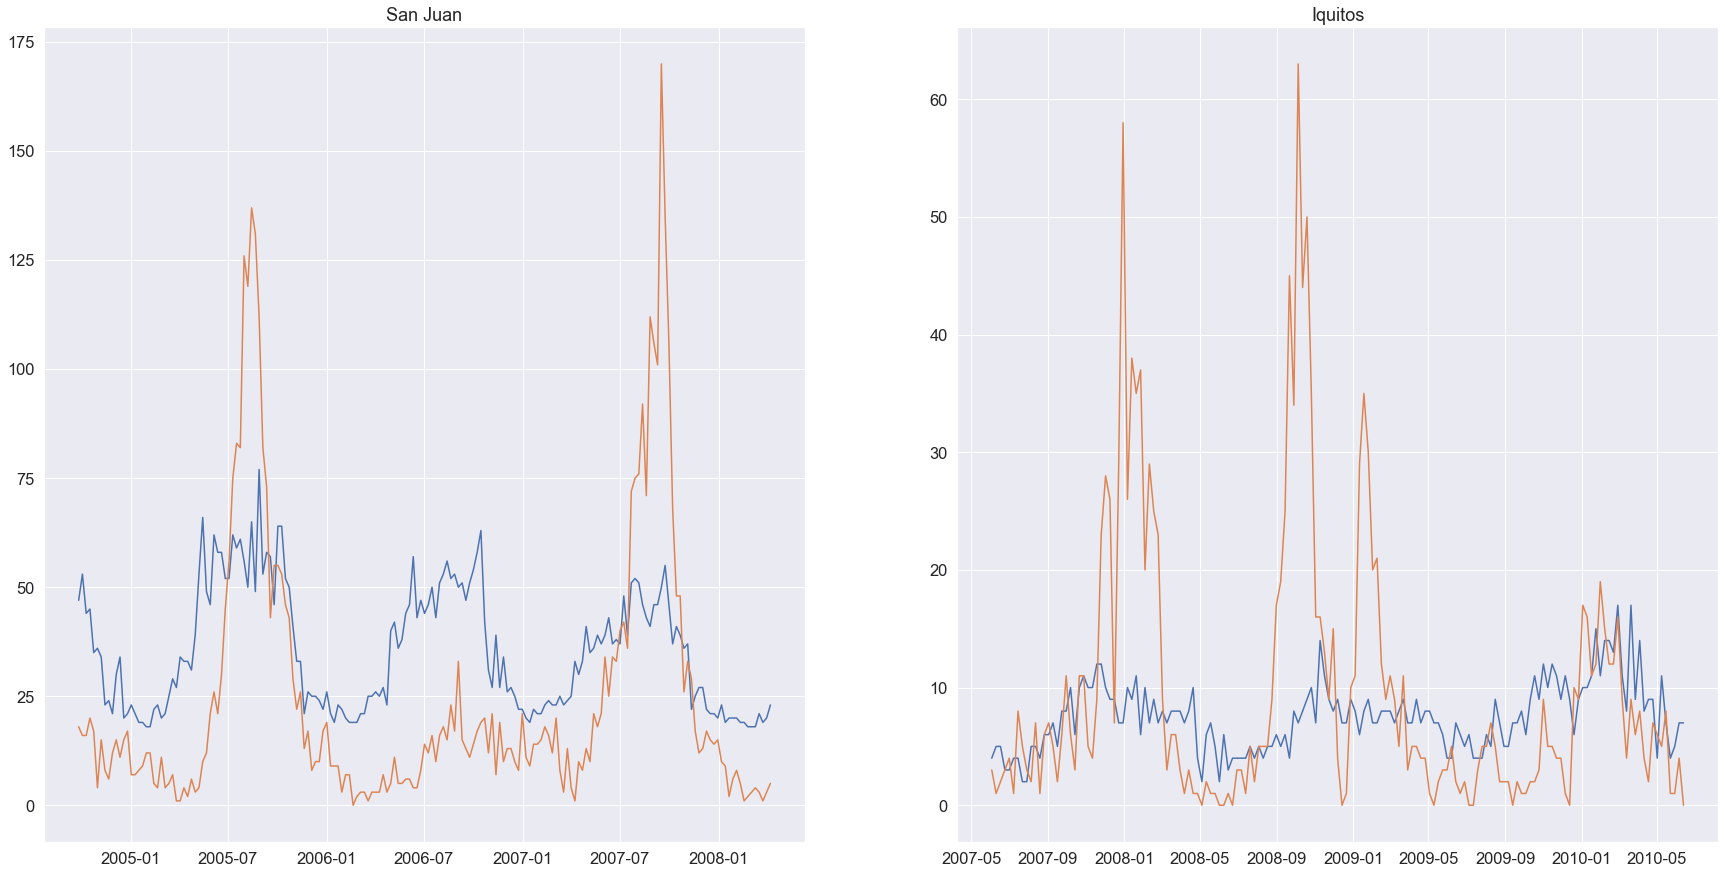

In [90]:
plt.figure(figsize = (30, 15))

plt.subplot(1, 2, 1)
plt.plot(nb_sj_model.predict(X_sj_temp_cv).astype(int), '-')
plt.plot(X_sj_temp_cv.y, '-')
plt.title('San Juan')
plt.subplot(1, 2, 2)
plt.plot(nb_iq_model.predict(X_iq_temp_cv).astype(int), '-')
plt.plot(X_iq_temp_cv.y, '-')
plt.title('Iquitos')
plt.show()

In [91]:
nb_sj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  935
Model:                            GLM   Df Residuals:                      930
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5337.9
Date:                Wed, 18 May 2022   Deviance:                       4770.7
Time:                        00:02:56   Pearson chi2:                 9.11e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               270.0297     49.101      5.499      0.000     173.793     366.266
reanalysis_specific_humidity_g_per_kg     1.2164      0.177      6.881      0.000       0.870       1.563
reanalysis_dew_point_temp_k              -1.0139      0.178     -5.685      0.000      -1.363      -0.664
reanalysis_min_air_temp_k                 0.0434      0.027      1.589      0.112      -0.010       0.097
station_min_temp_c                       -0.0171      0.019     -0.880      0.379      -0.055       0.021
=========================================================================================================
"""

In [92]:
nb_iq_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  519
Model:                            GLM   Df Residuals:                      514
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2936.7
Date:                Wed, 18 May 2022   Deviance:                       4305.6
Time:                        00:02:56   Pearson chi2:                 6.24e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               243.2729     53.457      4.551      0.000     138.499     348.047
reanalysis_specific_humidity_g_per_kg     1.0603      0.183      5.781      0.000       0.701       1.420
reanalysis_dew_point_temp_k              -0.9490      0.190     -5.007      0.000      -1.320      -0.578
reanalysis_min_air_temp_k                 0.0619      0.017      3.603      0.000       0.028       0.096
station_min_temp_c                        0.1339      0.019      7.025      0.000       0.097       0.171
=========================================================================================================
"""

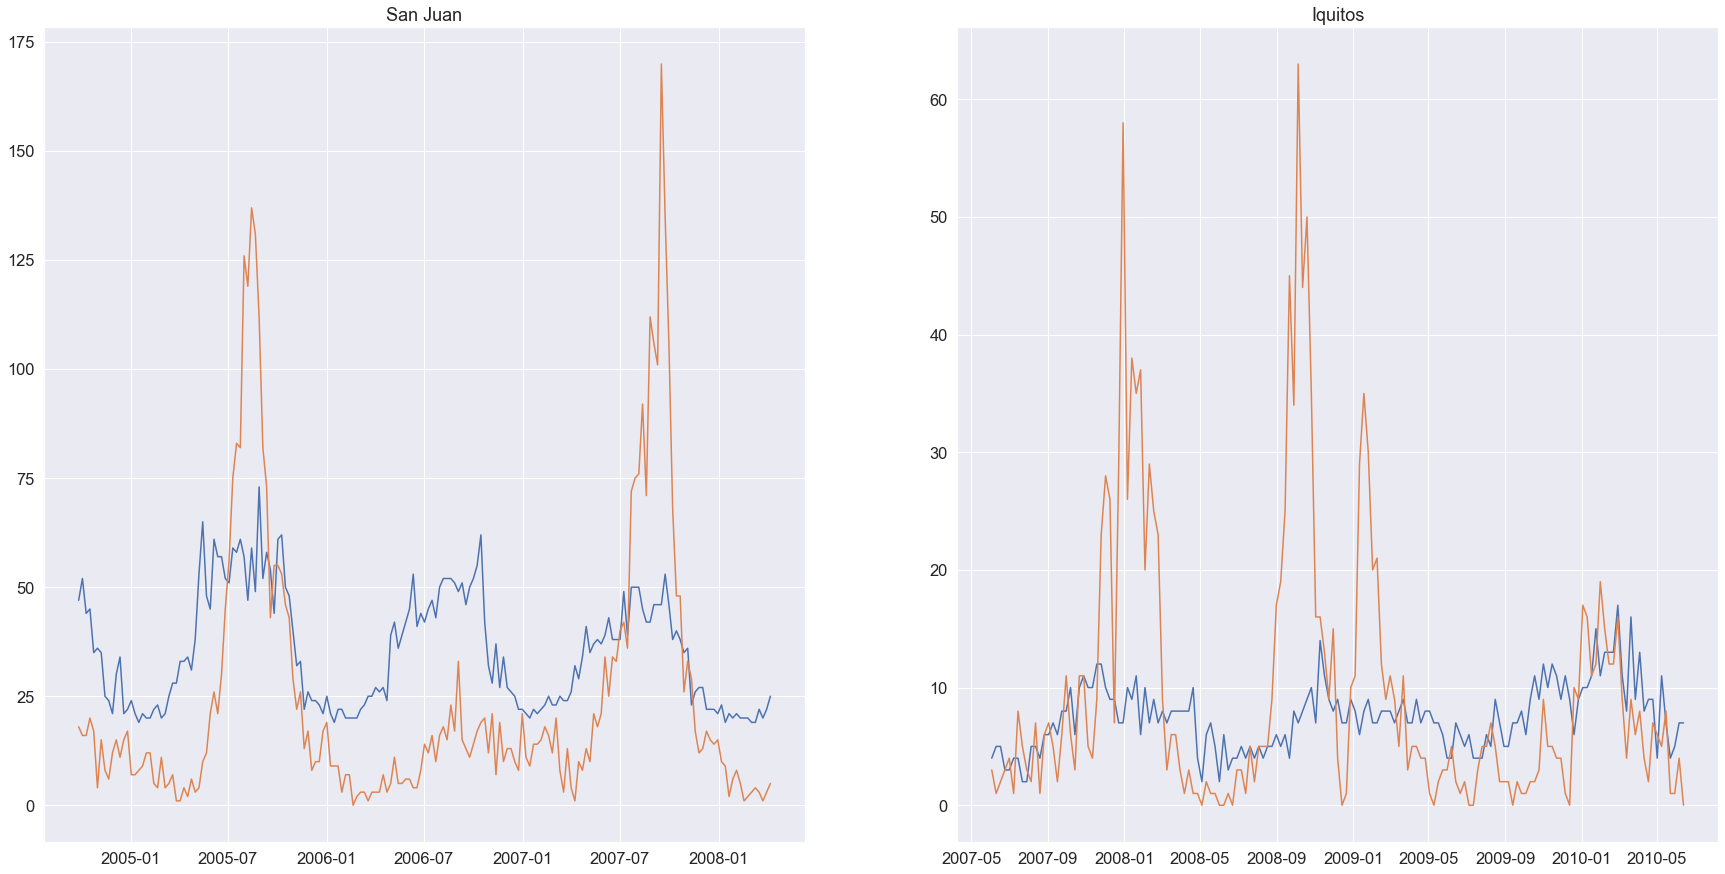

In [149]:
plt.figure(figsize = (30, 15))

plt.subplot(1, 2, 1)
plt.plot(poission_sj_model.predict(X_sj_temp_cv).astype(int), '-')
plt.plot(X_sj_temp_cv.y, '-')
plt.title('San Juan')

plt.subplot(1, 2, 2)
plt.plot(poission_iq_model.predict(X_iq_temp_cv).astype(int), '-')
plt.plot(X_iq_temp_cv.y, '-')
plt.title('Iquitos')
plt.show()

In [94]:
poission_sj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  935
Model:                            GLM   Df Residuals:                      930
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20251.
Date:                Wed, 18 May 2022   Deviance:                       36050.
Time:                        00:02:57   Pearson chi2:                 6.38e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               279.7663     19.787     14.139      0.000     240.985     318.548
reanalysis_specific_humidity_g_per_kg     1.2111      0.070     17.237      0.000       1.073       1.349
reanalysis_dew_point_temp_k              -1.0383      0.072    -14.451      0.000      -1.179      -0.898
reanalysis_min_air_temp_k                 0.0330      0.011      3.085      0.002       0.012       0.054
station_min_temp_c                        0.0128      0.007      1.731      0.083      -0.002       0.027
=========================================================================================================
"""

In [95]:
poission_iq_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  519
Model:                            GLM   Df Residuals:                      514
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3153.6
Date:                Wed, 18 May 2022   Deviance:                       4775.2
Time:                        00:02:57   Pearson chi2:                 6.76e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               226.6855     51.665      4.388      0.000     125.424     327.947
reanalysis_specific_humidity_g_per_kg     0.9999      0.177      5.649      0.000       0.653       1.347
reanalysis_dew_point_temp_k              -0.8896      0.183     -4.856      0.000      -1.249      -0.531
reanalysis_min_air_temp_k                 0.0622      0.017      3.752      0.000       0.030       0.095
station_min_temp_c                        0.1334      0.018      7.259      0.000       0.097       0.169
=========================================================================================================
"""

In [101]:
ridge_sj_model.scorer_

make_scorer(mean_squared_error, greater_is_better=False)

In [97]:
#ridge_sj_model.cv_results_

In [98]:
#ridge_iq_model.cv_results_

In [99]:
#lasso_sj_model.cv_results_

In [100]:
#lasso_iq_model.cv_results_